In [42]:
import numpy as np
import librosa
from matplotlib import pyplot as plt

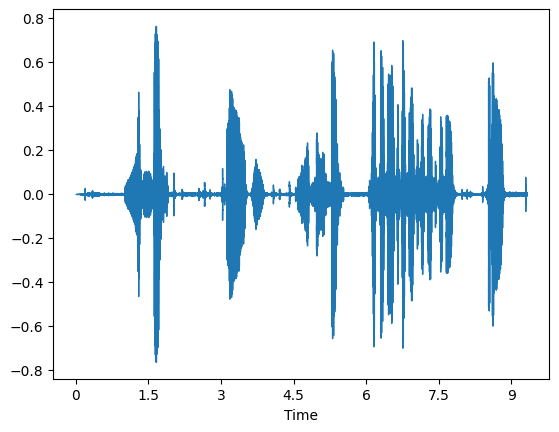

In [43]:
src_path = "F:\\projects\\pythonProjects\\pythonProject9\\test1\\test.wav"
wave, sr = librosa.load(src_path)
waveform_ae = []
librosa.display.waveshow(wave)

In [44]:
wave,sr

(array([ 0.        ,  0.        ,  0.        , ...,  0.00128385,
         0.00016974, -0.00162349], dtype=float32),
 22050)

In [45]:
def calc_amplitude_envelope(wave,frame_length,hop_size):
    wave_len = len(wave)
    gap = frame_length - hop_size
    if (wave_len - gap) % hop_size != 0 or wave_len < frame_length:
        frame_num = int((wave_len - frame_length) / hop_size) + 1
        pad = int(frame_num * hop_size + frame_length - wave_len)
        wave = np.pad(wave, (0,pad), mode="constant")
    frame_num = int((wave_len - frame_length) / hop_size) + 1
    for i in range(frame_num):
        current_frame = wave[i * hop_size : i * hop_size + frame_length]
        amplitude = max(current_frame)
        waveform_ae.append(amplitude)
    return np.array(waveform_ae)

In [39]:
frame_length = 1024
hop_size = int(frame_length * 0.5)
wave_ae = calc_amplitude_envelope(wave, frame_length, hop_size)

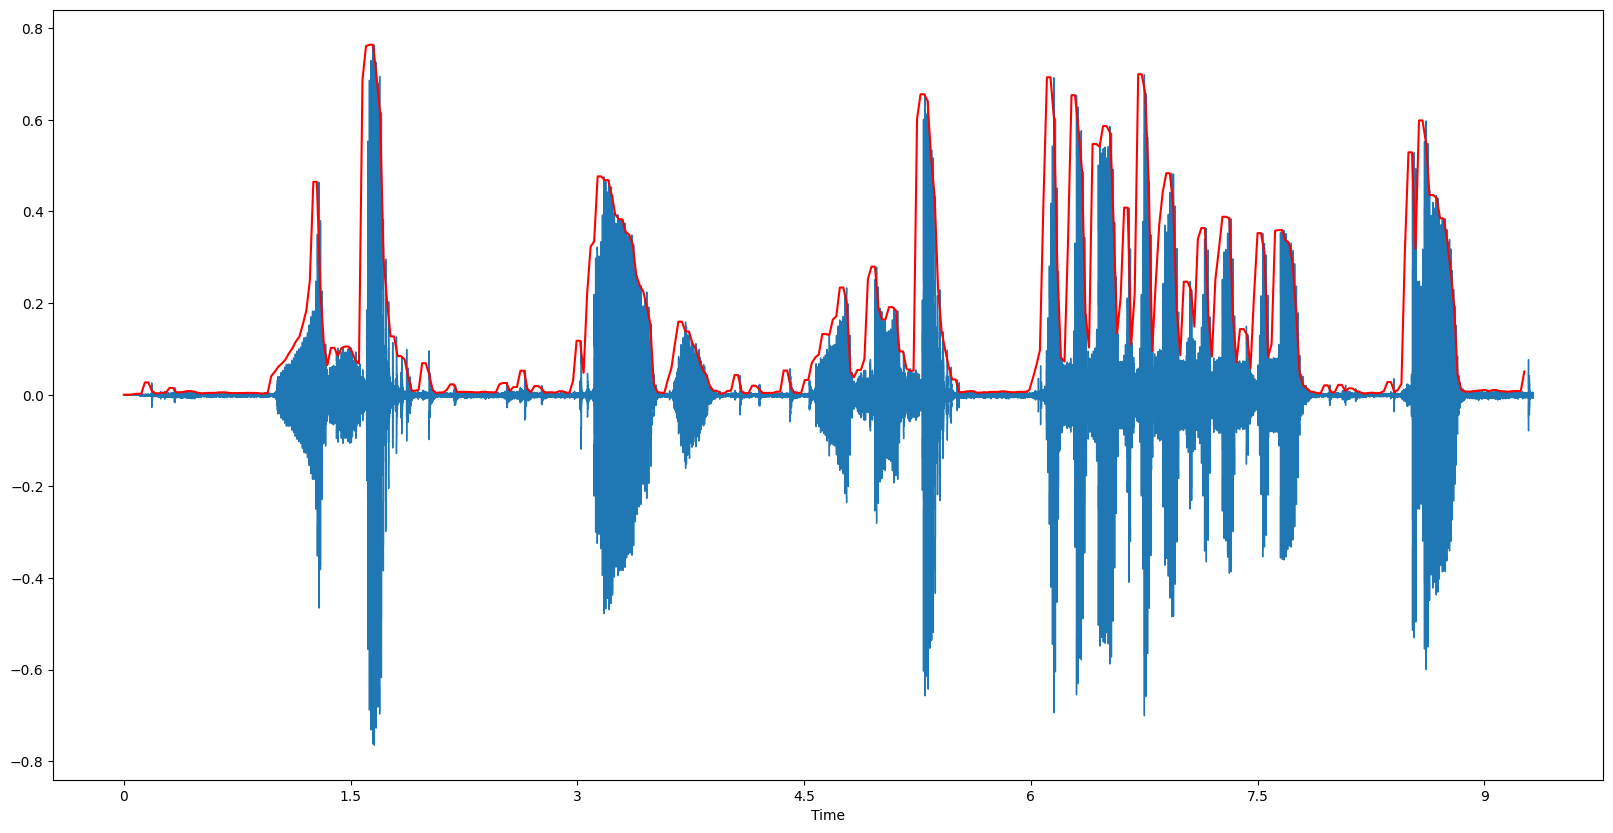

In [41]:
frame_scale = np.arange(0, len(wave_ae))
time_scale = librosa.frames_to_time(frame_scale, hop_length=hop_size)
plt.figure(figsize=(20,10))

plt.plot(time_scale, wave_ae, color='r')
librosa.display.waveshow(wave)
plt.show()